# Titanic - Data Exploration
## Data Description

In [1]:
# CSV reading
import pandas as pd
df_train = pd.read_csv("train.csv", delimiter=',')

In [2]:
# Data types
print(df_train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
# Data description
print(df_train.describe(include='all'))

        PassengerId    Survived      Pclass                          Name  \
count    891.000000  891.000000  891.000000                           891   
unique          NaN         NaN         NaN                           891   
top             NaN         NaN         NaN  Sage, Miss. Constance Gladys   
freq            NaN         NaN         NaN                             1   
mean     446.000000    0.383838    2.308642                           NaN   
std      257.353842    0.486592    0.836071                           NaN   
min        1.000000    0.000000    1.000000                           NaN   
25%      223.500000    0.000000    2.000000                           NaN   
50%      446.000000    0.000000    3.000000                           NaN   
75%      668.500000    1.000000    3.000000                           NaN   
max      891.000000    1.000000    3.000000                           NaN   

         Sex         Age       SibSp       Parch    Ticket        Fare  \
c

In [4]:
# Missing data
print(round(df_train.isnull().sum()*100/len(df_train),2).sort_values(ascending=False))

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64


## Data Visualization

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Died column
df_train['Died'] = 1 - df_train['Survived']

<AxesSubplot:xlabel='Sex'>

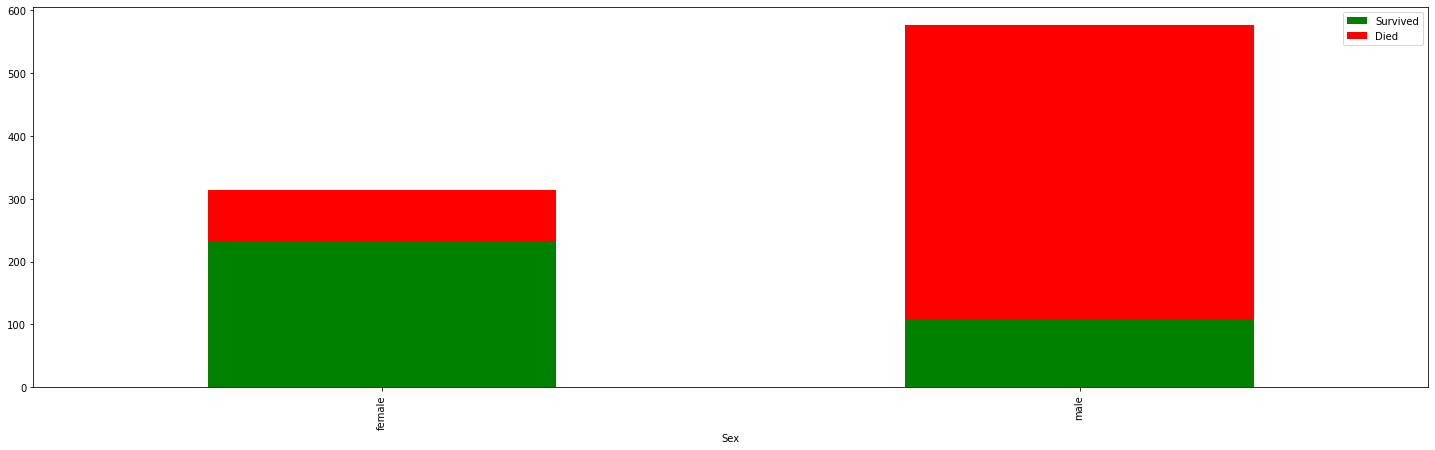

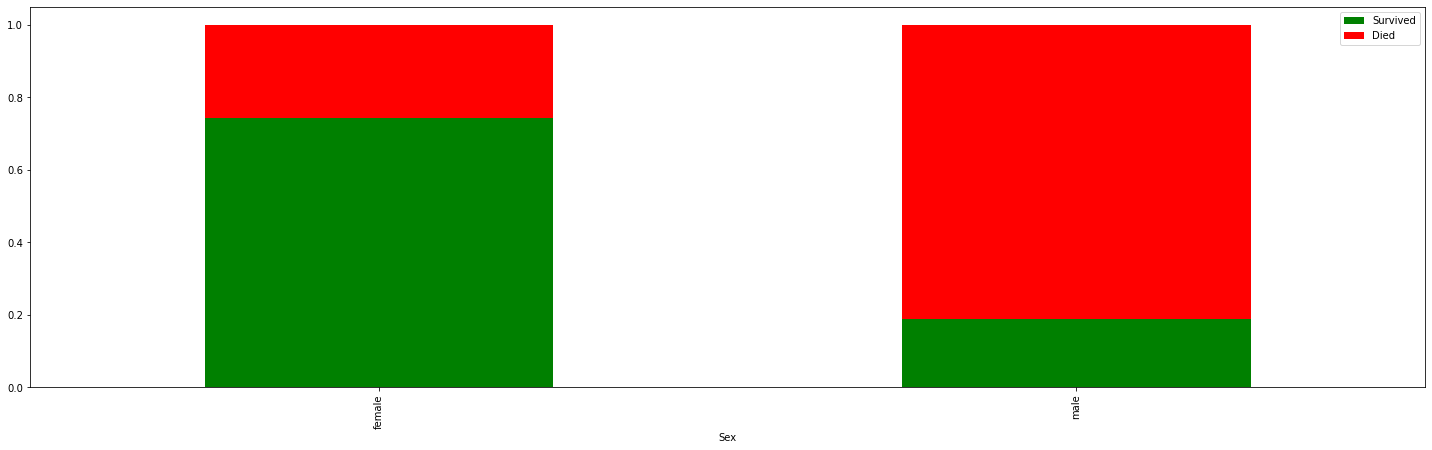

In [7]:
# Men v.s. women
df_train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color = ["g","r"])
df_train.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color = ["g","r"])

<AxesSubplot:xlabel='Pclass'>

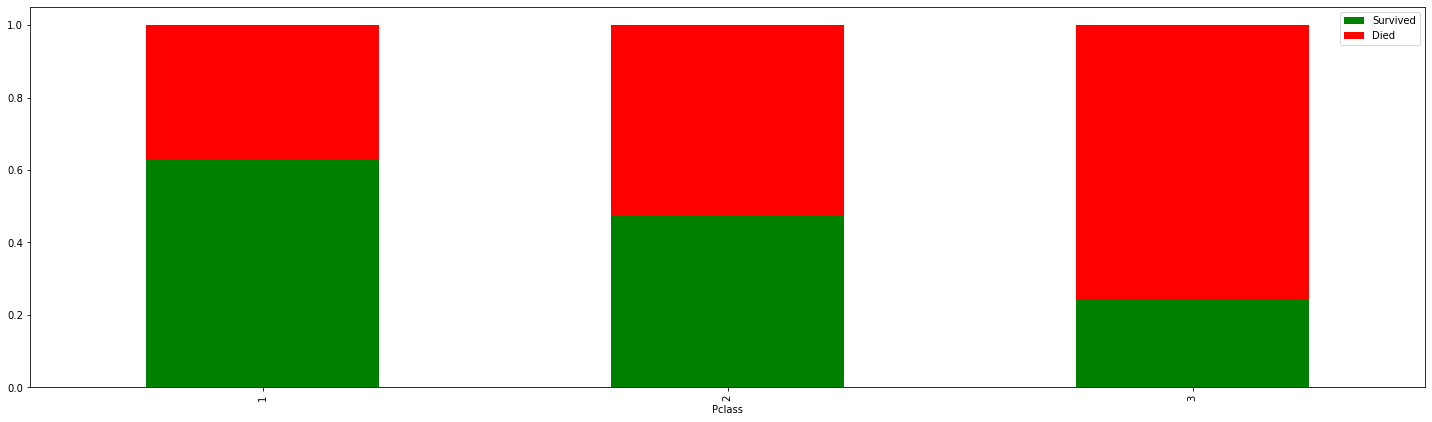

In [8]:
# Passenger class
df_train.groupby('Pclass').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color = ["g","r"])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

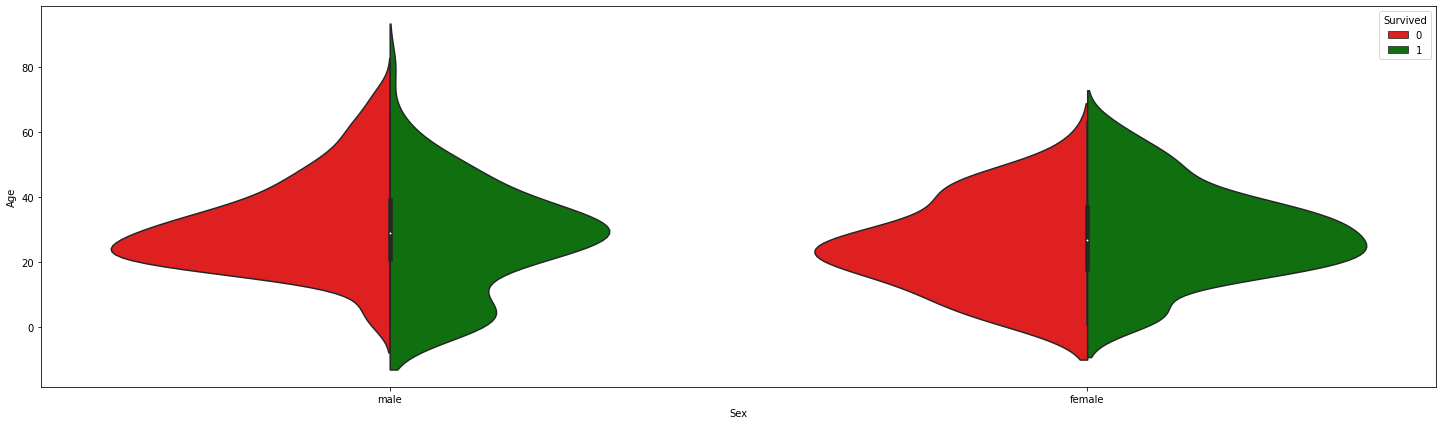

In [9]:
# Age
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, split=True, palette={0: "r", 1: "g"})

<AxesSubplot:xlabel='Pclass'>

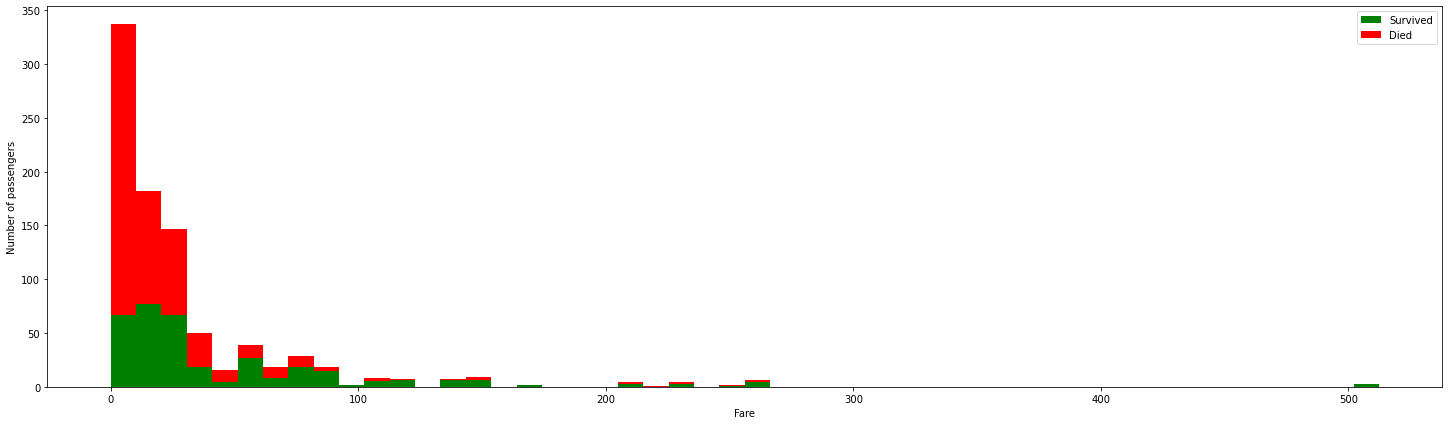

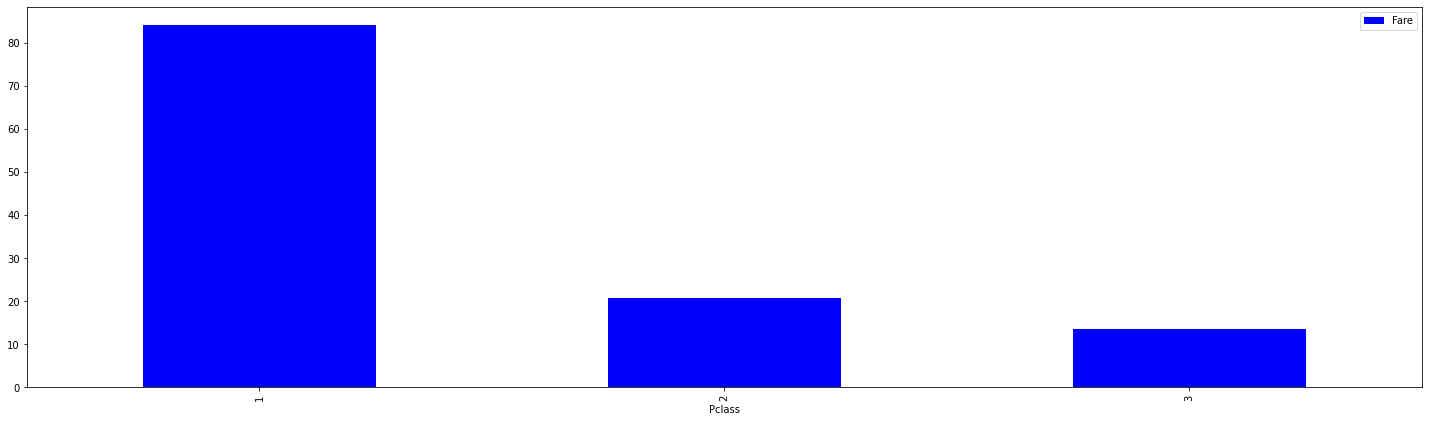

In [10]:
# Fare
figure = plt.figure(figsize=(25, 7))
plt.hist([df_train[df_train['Survived'] == 1]['Fare'], df_train[df_train['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

df_train.groupby('Pclass').agg('mean')[['Fare']].plot(kind='bar', figsize=(25, 7), color = ["b"])

<AxesSubplot:xlabel='Embarked'>

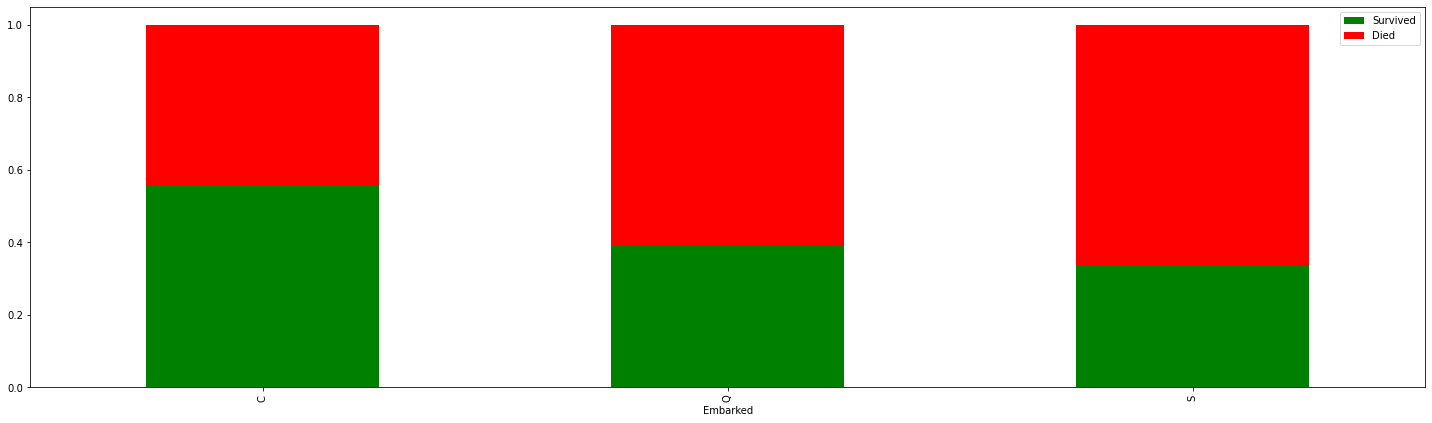

In [11]:
# Embarked
df_train.groupby('Embarked').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color = ["g","r"])

<AxesSubplot:xlabel='Parch'>

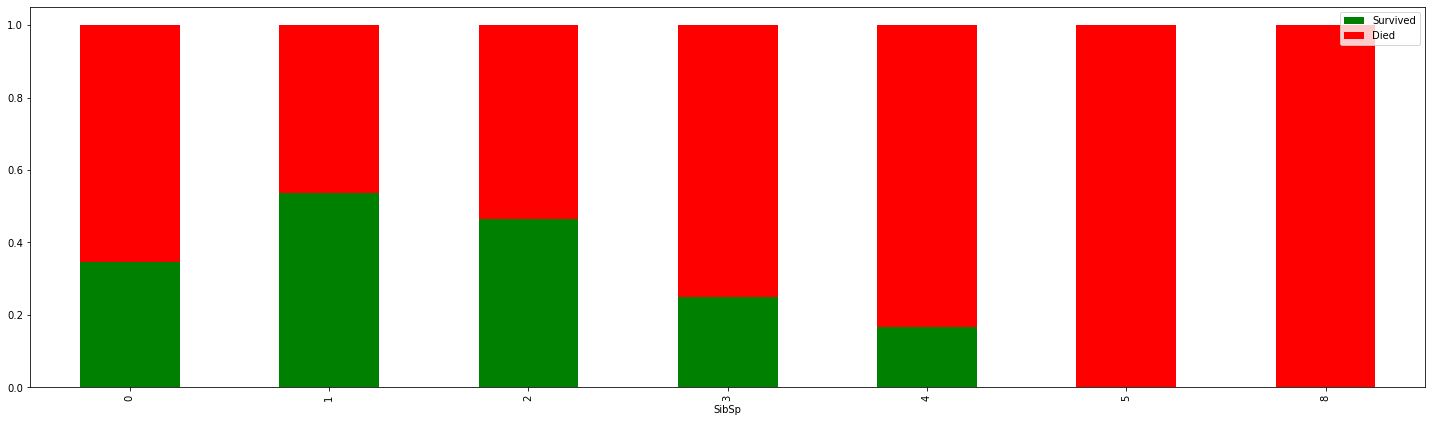

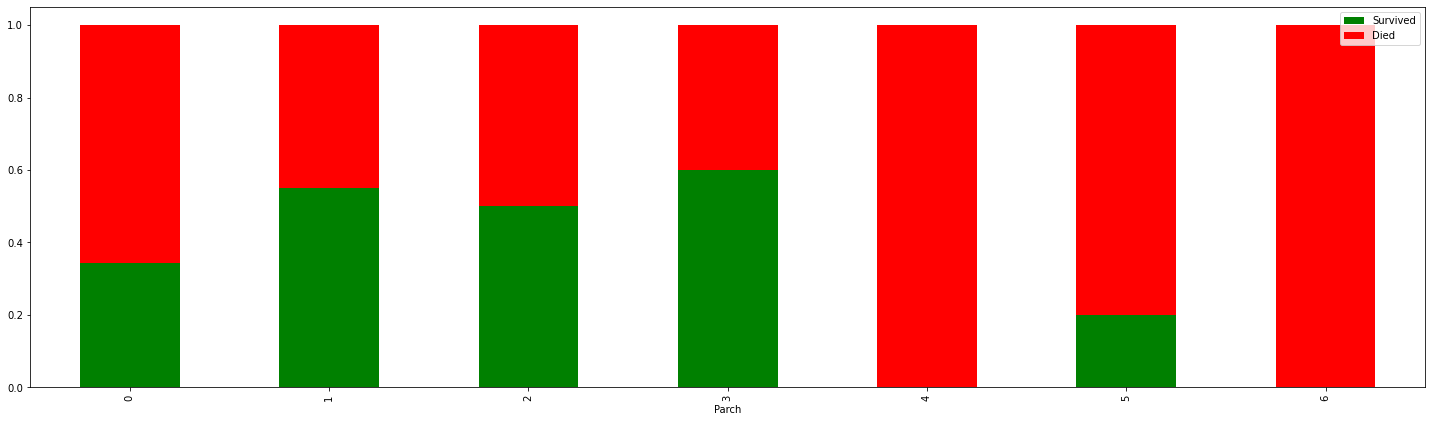

In [12]:
# Parents and siblings
df_train.groupby('SibSp').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color = ["g","r"])
df_train.groupby('Parch').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color = ["g","r"])

<AxesSubplot:xlabel='Deck'>

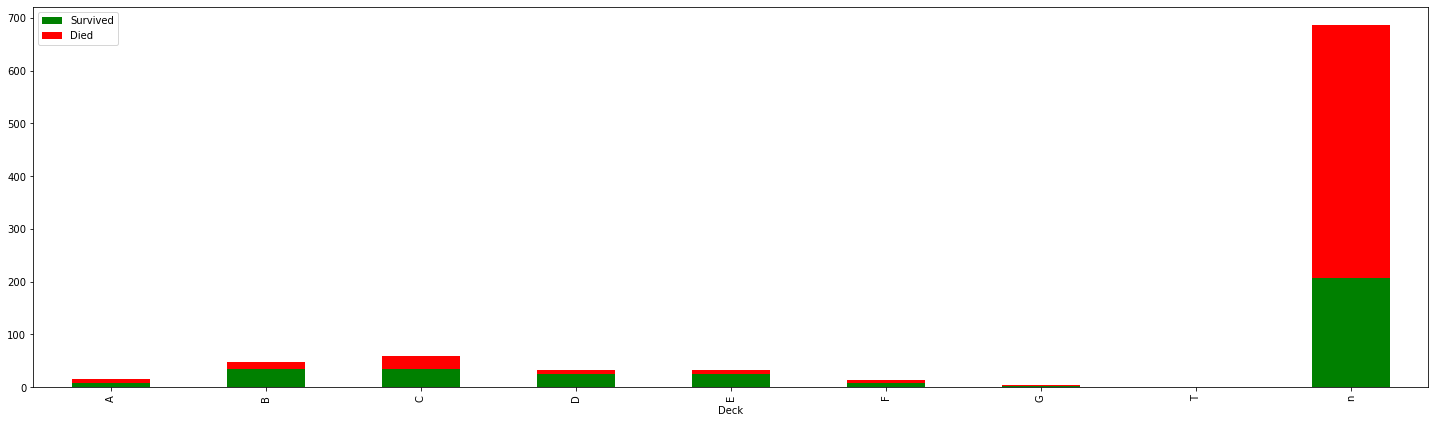

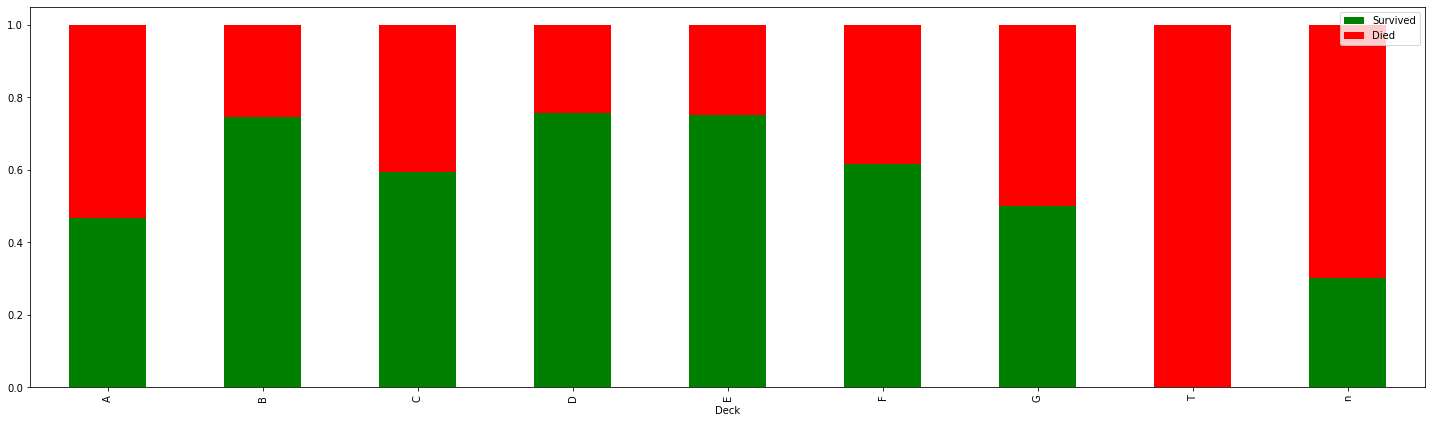

In [13]:
# Deck
df_train["Deck"]=df_train["Cabin"].astype(str).str[0]
df_train.groupby('Deck').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color = ["g","r"])
df_train.groupby('Deck').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color = ["g","r"])

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

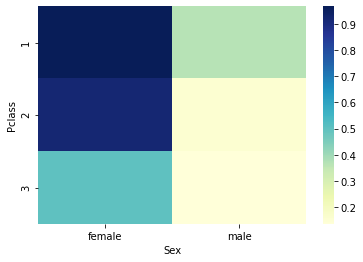

In [14]:
# Sex and pclass
heatmap_data = pd.pivot_table(df_train, values='Survived', index=['Pclass'], columns='Sex')
sns.heatmap(heatmap_data, cmap="YlGnBu")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

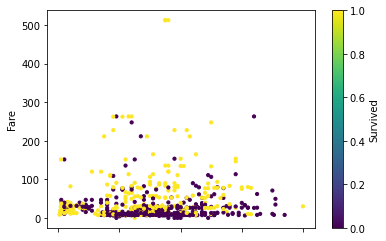

In [15]:
# Age and fare
df_train.plot.scatter(x='Age',y='Fare',c='Survived', s = 10, colormap='viridis')

<AxesSubplot:xlabel='Relative'>

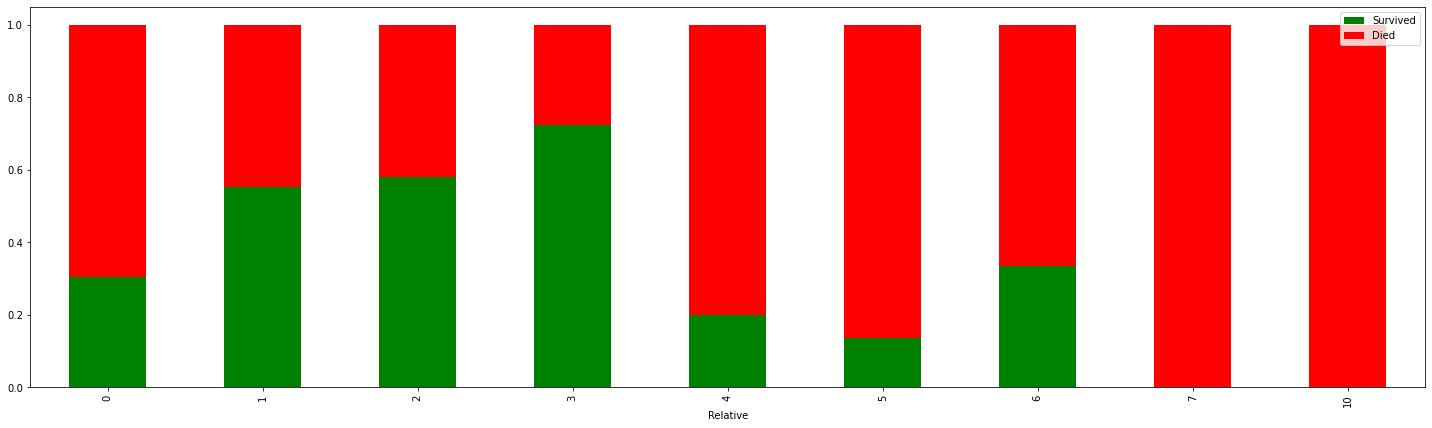

In [18]:
# We create a new feature : total number of relatives
df_train['Relative']=df_train['SibSp']+df_train['Parch']
df_train.groupby('Relative').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True, color = ["g","r"])

In [38]:
# Title
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False) #all letters before the .
# We replace titles with a more common title or as Rare
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

pd.pivot_table(df_train, values='Survived', index=['Title'], columns='Sex')

Sex,female,male
Title,,
Master,NaN,0.575000
Miss,0.702703,NaN
Mr,NaN,0.156673
Mrs,0.793651,NaN
Rare,1.000000,0.250000
